# Hyperparameter Optimization with Hyperopt



## Install Hyperopt package

In [1]:
!pip install hyperopt

## Import required libraries

In [10]:
import warnings
warnings.simplefilter('ignore')
from ludwig.api import LudwigModel
from ludwig.utils.data_utils import load_json
from ludwig.visualize import learning_curves
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import hyperopt
import logging

In [18]:
model_definition = {
    'input_features': [
        {'name': 'Pclass', 'type': 'category'},
        {'name': 'Sex', 'type': 'category'},
        {'name': 'Age', 'type': 'numerical', 
            'preprocessing': {'missing_value_strategy': 'fill_with_mean', 'normalization': 'zscore'}},
        {'name': 'SibSp', 'type': 'numerical', 
            'preprocessing': {'missing_value_strategy': 'fill_with_mean', 'normalization': 'minmax'}},
        {'name': 'Parch', 'type': 'numerical',
            'preprocessing': {'missing_value_strategy': 'fill_with_mean', 'normalization': 'minmax'}},
        {'name': 'Fare', 'type': 'numerical',
            'preprocessing': {'missing_value_strategy': 'fill_with_mean', 'normalization': 'zscore'}},
        {'name': 'Embarked', 'type': 'category'}
    ],
    
    'output_features':[
        {'name': 'Survived', 'type': 'binary', 
            'fc_layers': [{'fc_size': 50}] }
    ]
}

In [19]:
# clean out old results
try:
    shutil.rmtree('./results')
except:
    pass

try:
    shutil.rmtree('./visualizations')
except:
    pass

try:
    file_list = glob.glob('./data/*.json')
    file_list.append(glob.glob('./data/*.hdf5'))
    os.remove(file_list)
except:
    pass


In [20]:
# Define Ludwig model object that drive model training
model = LudwigModel(model_definition,
                    logging_level=logging.INFO)

# initiate model training
train_stats = model.train(data_csv='./data/train.csv',
                         experiment_name='experiment_name',
                         model_name='model_name')



model.close()

Experiment name: experiment_name
Model name: model_name
Output path: results/experiment_name_model_name_3


ludwig_version: '0.2.1'
command: ('/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py -f '
 '/root/.local/share/jupyter/runtime/kernel-36a3f7dd-7721-4db4-9604-77fc3e5a525d.json')
commit_hash: '05d6c6917e10'
random_seed: 42
input_data: './data/train.csv'
model_definition: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'name': 'Pclass',
                              'tied_weights': None,
                              'type': 'category'},
                          {   'name': 'Sex',
                              'tied_weights': None,
                              'type': 'category'},
                          {   'name': 'Age',
                              'preprocessing': {   'missing_value_strategy': 'fill_with_mean',
                                                   'normalization': 'zscore'},
                              'tied_weights': None,
    



Using full raw csv, no hdf5 and json file with the same name have been found
Building dataset (it may take a while)
Writing dataset
Writing train set metadata with vocabulary
Training set: 630
Validation set: 81
Test set: 180
  embedding_size (50) is greater than vocab_size (4). Setting embedding size to be equal to vocab_size.
  embedding_size (50) is greater than vocab_size (3). Setting embedding size to be equal to vocab_size.
  embedding_size (50) is greater than vocab_size (5). Setting embedding size to be equal to vocab_size.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
targets is deprecated, use labels instead

╒══════════╕
│ TRAINING │
╘══════════╛



Epoch   1
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 484.30it/s]
Took 0.3089s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.8190 │     0.4

Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 507.94it/s]
Took 0.4775s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.5427 │     0.7222 │
├────────────┼────────┼────────────┤
│ vali       │ 0.5458 │     0.7654 │
├────────────┼────────┼────────────┤
│ test       │ 0.5391 │     0.7444 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  12
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 642.51it/s]
Took 0.4410s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.5318 │     0.7159 │
├────────────┼────────┼────────────┤
│ vali       │ 0.5340 │     0.7654 │
├────────────┼────────┼────────────┤
│ test       │ 0.5254 │     0.7667 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  13
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 5

Validation loss on combined improved, model saved


Epoch  24
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 563.15it/s]
Took 0.4464s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4642 │     0.8000 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4662 │     0.7778 │
├────────────┼────────┼────────────┤
│ test       │ 0.4428 │     0.8000 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  25
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 633.53it/s]
Took 0.4502s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4612 │     0.8016 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4641 │     0.7654 │
├────────────┼────────┼────────────┤
│ test       │ 0.4398 │     0.7944 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Ep

Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 495.87it/s]
Took 0.4690s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4394 │     0.8079 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4533 │     0.7901 │
├────────────┼────────┼────────────┤
│ test       │ 0.4206 │     0.8111 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  37
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 559.09it/s]
Took 0.4784s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4380 │     0.8079 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4530 │     0.7901 │
├────────────┼────────┼────────────┤
│ test       │ 0.4197 │     0.8167 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  38
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 3

Validation loss on combined improved, model saved


Epoch  49
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 605.85it/s]
Took 0.4883s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4251 │     0.8143 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4504 │     0.7778 │
├────────────┼────────┼────────────┤
│ test       │ 0.4141 │     0.8222 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  50
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 458.74it/s]
Took 0.5144s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4242 │     0.8159 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4501 │     0.7901 │
├────────────┼────────┼────────────┤
│ test       │ 0.4139 │     0.8222 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Ep

Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 507.85it/s]
Took 0.4793s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4157 │     0.8206 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4488 │     0.7901 │
├────────────┼────────┼────────────┤
│ test       │ 0.4128 │     0.8111 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  62
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 381.58it/s]
Took 0.5195s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4150 │     0.8206 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4488 │     0.7901 │
├────────────┼────────┼────────────┤
│ test       │ 0.4126 │     0.8111 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  63
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 5

Validation loss on combined improved, model saved


Epoch  74
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 636.85it/s]
Took 0.4619s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4084 │     0.8302 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4465 │     0.8025 │
├────────────┼────────┼────────────┤
│ test       │ 0.4105 │     0.8222 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  75
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 455.01it/s]
Took 0.4499s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4080 │     0.8302 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4463 │     0.8025 │
├────────────┼────────┼────────────┤
│ test       │ 0.4104 │     0.8222 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Ep

Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 440.16it/s]
Took 0.4722s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4034 │     0.8333 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4444 │     0.8272 │
├────────────┼────────┼────────────┤
│ test       │ 0.4086 │     0.8167 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  87
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 535.88it/s]
Took 0.3719s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.4030 │     0.8333 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4443 │     0.8272 │
├────────────┼────────┼────────────┤
│ test       │ 0.4086 │     0.8167 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model saved


Epoch  88
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 4

Validation loss on combined improved, model saved


Epoch  99
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 477.36it/s]
Took 0.4470s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.3988 │     0.8286 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4434 │     0.8148 │
├────────────┼────────┼────────────┤
│ test       │ 0.4076 │     0.8167 │
╘════════════╧════════╧════════════╛
Last improvement of loss on combined happened 1 epoch ago


Epoch 100
Evaluation test : 100%|██████████| 2/2 [00:00<00:00, 721.54it/s]
Took 0.3585s
╒════════════╤════════╤════════════╕
│ Survived   │   loss │   accuracy │
╞════════════╪════════╪════════════╡
│ train      │ 0.3985 │     0.8286 │
├────────────┼────────┼────────────┤
│ vali       │ 0.4434 │     0.8148 │
├────────────┼────────┼────────────┤
│ test       │ 0.4074 │     0.8167 │
╘════════════╧════════╧════════════╛
Validation loss on combined improved, model sa

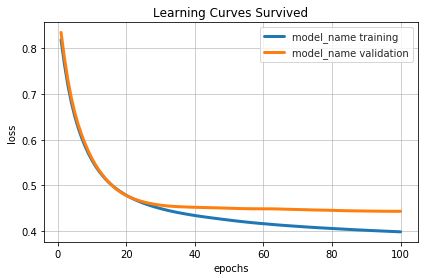

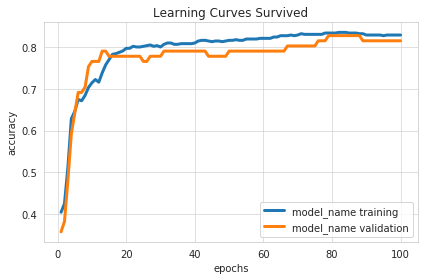

In [21]:
# generating learning curves from training
learning_curves(train_stats, 'Survived',
                model_names=['model_name'],
                output_directory='./visualizations',
                file_format='png')